<h1>About The Dataset</h2>

<h3>Work with a data set consisting of high-grossing movies, according to the Internet Movie Database(IMDb).
IMDb is an online extensive database for films, television programs and video games. Dataset is downloaded from the Kaggle.</h3>


In [409]:
%matplotlib inline

In [410]:
## import the dataset
import pandas as pd
movie_data = pd.read_csv('movie_metadata.csv')

In [411]:
## have a look on the dataset
movie_data.head()

,movie_title,director_name,color,duration,actor_1_name,language,country,title_year
0,Avatar,James Cameron,Color,178.0,CCH Pounder,English,USA,2009.0
1,Pirates of the Caribbean: At World's End,Gore Verbinski,Color,169.0,Johnny Depp,English,USA,2007.0
2,Spectre,Sam Mendes,Color,148.0,Christoph Waltz,English,UK,2015.0
3,The Dark Knight Rises,Christopher Nolan,Color,164.0,Tom Hardy,English,USA,2012.0
4,Star Wars: Episode VII - The Force Awakens,JJ Abrams,Color,136.0,Harrison Ford,English,USA,2015.0


In [412]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4932 entries, 0 to 4931
Data columns (total 8 columns):
movie_title      4932 non-null object
director_name    4831 non-null object
color            4916 non-null object
duration         4918 non-null float64
actor_1_name     4926 non-null object
language         4922 non-null object
country          4930 non-null object
title_year       4829 non-null float64
dtypes: float64(2), object(6)
memory usage: 308.3+ KB


<p>we can see some values are not present in the dataset</p>

C:\Users\Praneet\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


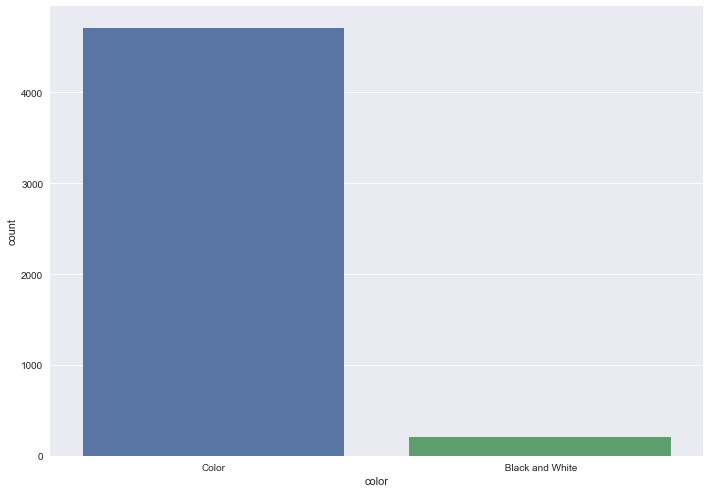

In [413]:
## now look at the ratio of color and black&white films
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='color', data = movie_data)

<p>As we can see the %age of "Color" films is much more than that of "black and white" films.
Hence, we replace NA values with the "Color" films</p>

In [414]:
movie_data["color"] = movie_data.color.fillna("color")
## Now we can see all entries of color column has filled
## Now fill all NA values of the duration column with the median 
movie_data["duration"] = movie_data.duration.fillna(movie_data.duration.median())
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4932 entries, 0 to 4931
Data columns (total 8 columns):
movie_title      4932 non-null object
director_name    4831 non-null object
color            4932 non-null object
duration         4932 non-null float64
actor_1_name     4926 non-null object
language         4922 non-null object
country          4930 non-null object
title_year       4829 non-null float64
dtypes: float64(2), object(6)
memory usage: 308.3+ KB


In [415]:
## Now we see the frequencies of various languages in the dataset
movie_data.language.value_counts()

English       4611
French          71
Spanish         38
Hindi           27
Mandarin        23
German          18
Japanese        17
Cantonese       11
Russian         11
Italian          9
Portuguese       8
Korean           7
Arabic           5
Hebrew           5
Danish           5
Swedish          5
Polish           4
Norwegian        4
Dutch            4
Chinese          3
Thai             3
Persian          3
Aboriginal       2
Dari             2
Icelandic        2
Zulu             2
Indonesian       2
None             2
Greek            1
Czech            1
Aramaic          1
Filipino         1
Vietnamese       1
Kannada          1
Urdu             1
Hungarian        1
Tamil            1
Kazakh           1
Bosnian          1
Mongolian        1
Slovenian        1
Dzongkha         1
Romanian         1
Telugu           1
Panjabi          1
Maya             1
Name: language, dtype: int64

In [416]:
## the frequency of 'English' language is much higher than any other language
## Hence, we filled the empty values with the 'English' language
movie_data["language"] = movie_data.language.fillna("English")

## Now look at the 'country' feature of the dataset
#movie_data.country.value_counts()

In [417]:
## as we can see the frequency of 'USA' is much higher than any other country
## hence we replace the empty values with the county 'USA'
movie_data["country"] = movie_data.country.fillna("USA")
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4932 entries, 0 to 4931
Data columns (total 8 columns):
movie_title      4932 non-null object
director_name    4831 non-null object
color            4932 non-null object
duration         4932 non-null float64
actor_1_name     4926 non-null object
language         4932 non-null object
country          4932 non-null object
title_year       4829 non-null float64
dtypes: float64(2), object(6)
memory usage: 308.3+ KB


In [418]:
## now again look at the dataset
## and tell the movie with maximum and minimum duration
max_duration = movie_data.duration.max()
min_duration = movie_data.duration.min()

In [419]:
## movie details with maximum duration
movie_data[movie_data.duration == max_duration]

,movie_title,director_name,color,duration,actor_1_name,language,country,title_year
1697,Trapped,NaN,Color,511.0,Ólafur Darri Ólafsson,Icelandic,Iceland,NaN


In [420]:
## movie details with minimum duration
movie_data[movie_data.duration == min_duration]

,movie_title,director_name,color,duration,actor_1_name,language,country,title_year
1929,Shaun the Sheep,NaN,Color,7.0,Justin Fletcher,English,UK,NaN
2323,The Touch,Jane Clark,Color,7.0,Necar Zadegan,English,USA,2007.0


In [421]:
movie_data.head()

,movie_title,director_name,color,duration,actor_1_name,language,country,title_year
0,Avatar,James Cameron,Color,178.0,CCH Pounder,English,USA,2009.0
1,Pirates of the Caribbean: At World's End,Gore Verbinski,Color,169.0,Johnny Depp,English,USA,2007.0
2,Spectre,Sam Mendes,Color,148.0,Christoph Waltz,English,UK,2015.0
3,The Dark Knight Rises,Christopher Nolan,Color,164.0,Tom Hardy,English,USA,2012.0
4,Star Wars: Episode VII - The Force Awakens,JJ Abrams,Color,136.0,Harrison Ford,English,USA,2015.0


In [459]:
## creating new movie dataset
new_movie_data = movie_data[['movie_title', 'color', 'duration', 'language', 'country']]
new_movie_data.head()

,movie_title,color,duration,language,country
0,Avatar,Color,178.0,English,USA
1,Pirates of the Caribbean: At World's End,Color,169.0,English,USA
2,Spectre,Color,148.0,English,UK
3,The Dark Knight Rises,Color,164.0,English,USA
4,Star Wars: Episode VII - The Force Awakens,Color,136.0,English,USA


In [460]:
new_movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4932 entries, 0 to 4931
Data columns (total 5 columns):
movie_title    4932 non-null object
color          4932 non-null object
duration       4932 non-null float64
language       4932 non-null object
country        4932 non-null object
dtypes: float64(1), object(4)
memory usage: 192.7+ KB


In [461]:
## arrange according to the languages and country
#new_movie_data.set_index(['language', 'country'])

In [462]:
# get total duration of movies in different languages
data = new_movie_data.groupby(['language']).duration.sum()

In [476]:
df = pd.DataFrame(data)
df

,duration
language,
Aboriginal,222.0
Arabic,511.0
Aramaic,120.0
Bosnian,127.0
Cantonese,1072.0
Chinese,351.0
Czech,113.0
Danish,481.0
Dari,211.0


In [477]:
# get total duration of movies in different countries
new_movie_data.groupby(['country']).duration.sum()

In [ ]:
new_movie_data.replace('color', 'Color', inplace=True)

In [480]:
# get total durationof movies in different color
df_color = new_movie_data.groupby(['color']).duration.sum()
df_color = pd.DataFrame(df_color)
df_color

,duration
color,
Black and White,22834.0
Color,506537.0


<h2> Created a function : movie_summary(), which gives us the summary of the input movie name</h2>

In [369]:
movie_data.head()

,movie_title,director_name,color,duration,actor_1_name,language,country,title_year
0,Avatar,James Cameron,Color,178.0,CCH Pounder,English,USA,2009.0
1,Pirates of the Caribbean: At World's End,Gore Verbinski,Color,169.0,Johnny Depp,English,USA,2007.0
2,Spectre,Sam Mendes,Color,148.0,Christoph Waltz,English,UK,2015.0
3,The Dark Knight Rises,Christopher Nolan,Color,164.0,Tom Hardy,English,USA,2012.0
4,Star Wars: Episode VII - The Force Awakens,JJ Abrams,Color,136.0,Harrison Ford,English,USA,2015.0


In [370]:
## creating an array of movie names
import numpy as np
name = np.array(movie_data['movie_title'])
movie_name=[]
for word in name:
    word = word.lower()
    movie_name.append(word)
    
movie_name = np.array(movie_name)
movie_name

array(['avatar', "pirates of the caribbean: at world's end", 'spectre',
       ..., 'george washington', 'smiling fish & goat on fire',
       'dawn of the crescent moon'],
      dtype='<U86')

In [371]:
## Create a function which give summary of the movie on 
## inputing the movie name

def movie_summary(input):
    
    input=input.lower()
    if input in movie_name:
        
        i, = np.where( movie_name == input )
        data = movie_data.iloc[i]
        return data
    else:
        return ("No Result Found. Please recheck the movie name")

        
    

In [372]:
movie_summary('Avatar')

,movie_title,director_name,color,duration,actor_1_name,language,country,title_year
0,Avatar,James Cameron,Color,178.0,CCH Pounder,English,USA,2009.0


In [373]:
movie_summary("stealth")

,movie_title,director_name,color,duration,actor_1_name,language,country,title_year
163,Stealth,Rob Cohen,Color,121.0,Sam Shepard,English,USA,2005.0


In [374]:
movie_summary("airlift")

,movie_title,director_name,color,duration,actor_1_name,language,country,title_year
3823,Airlift,Raja Menon,Color,130.0,Nimrat Kaur,Hindi,India,2016.0


In [375]:
movie_summary("Abcd")

'No Result Found. Please recheck the movie name'